# Processing Benchmarking Results
This notebook is meant to be run with results.csv, included in the same directory. Results.csv was generated from benchmark_A.py with the following settings:\
n: integer values from 5 to 20\
k = n // 5\
q = 0.5\
number_of_trials = 6. Note we discard the first trial since GPT model is warming up, and only record the following 5 trials.

# Step 1: Compute Averages

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils as u # utility files to help make code clean and readable
from utils import compute_average

# Loads data from csv file. 
data = u.open_csv_results('results.csv')

# Takes csv data, chunks the data by node size, and computes standard deviation for each node size. Sends back zipped files
zipped, zipped_stds = u.df_to_slices(data)

# Unzip standard deviations
(
    _, 
    qokit_time_stds, # Standard deviation for qokit runtime
    gpt_time_stds, # Standard deviation for GPT runtime
    qokit_ar_stds, # Standard deviation for QOKit approximation Ratios
    gpt_ar_stds, # Standard deviation for GPT approximation Ratios
    qokit_mem_stds, # Standard deviation for QOKit RAM usage
    gpt_mem_stds # Standard deviation for GPT RAM usage
) = zip(*zipped_stds)

# Lists to hold x and y values
# After the for loop, these variables will hold similar to a pandas dataframe:
"""
Node Size, Average QOKit Times, Average GPT Times, Average QOKit AR, Average GPT AR, Average QOKit Ram, Average GPT Ram
5            .                      .                    .                 .            .                   .
6            .                      .                    .                 .            .                   .
.            .                      .                    .                 .            .                   .
.            .                      .                    .                 .            .                   .
.            .                      .                    .                 .            .                   .
20            .                      .                    .                 .            .                   .
"""
node_counts = []
qokit_times = []
gpt_times = []
qokit_ars = []
gpt_ars = []
qokit_mems = []
gpt_mems = []

# We iterate over the zipped object, calcualting the average value for each benchmark for each node size
for node, qokit_time, gpt_time, qokit_ar, gpt_ar, qokit_peak_memory, gpt_peak_memory in zipped:
    node_counts.append(compute_average(_)) 
    qokit_times.append(compute_average(qokit_time))
    gpt_times.append(compute_average(gpt_time))
    qokit_ars.append(compute_average(qokit_ar))
    gpt_ars.append(compute_average(gpt_ar))
    qokit_mems.append(compute_average(qokit_peak_memory))
    gpt_mems.append(compute_average(gpt_peak_memory))


# Step 2: Display Processed Data


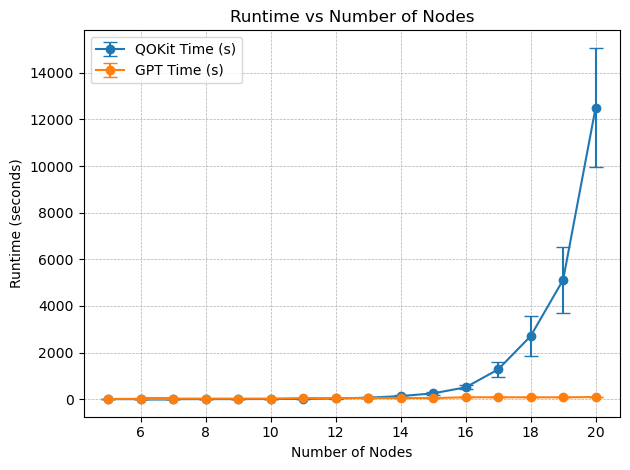

In [3]:
# Runtime for QOKit and GPT model as a function of the number of nodes. Error bars are included for both. For GPT model, they are too small for Matplotlib to render
u.draw_plot(
    x=node_counts,
    y_series=[qokit_times, gpt_times],
    y_errors=[qokit_time_stds, gpt_time_stds],  # pass std devs here
    labels=["QOKit Time (s)", "GPT Time (s)"],
    xlabel="Number of Nodes",
    ylabel="Runtime (seconds)",
    title="Runtime vs Number of Nodes",
    yscale= "linear",
    show_grid=True,
    filename='time_comparison.png'
)

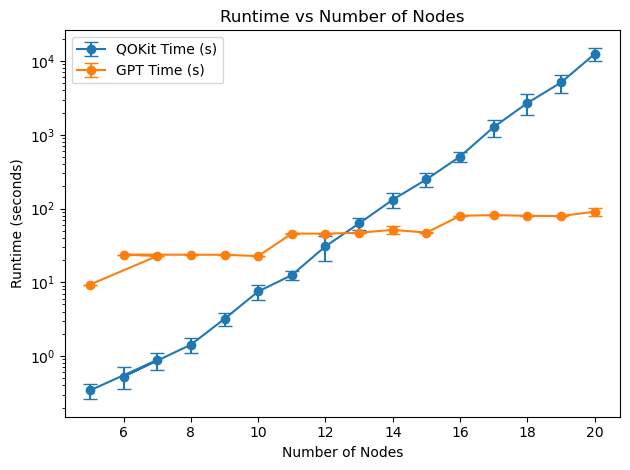

In [8]:
# Same data displayed on above graph. This is a logirthmic plot
u.draw_plot(
    x=node_counts,
    y_series=[qokit_times, gpt_times],
    y_errors=[qokit_time_stds, gpt_time_stds],  # pass std devs here
    labels=["QOKit Time (s)", "GPT Time (s)"],
    xlabel="Number of Nodes",
    ylabel="Runtime (seconds)",
    title="Runtime vs Number of Nodes",
    yscale= "log",
    show_grid=False,
    filename='time_comparison_log.png'
)

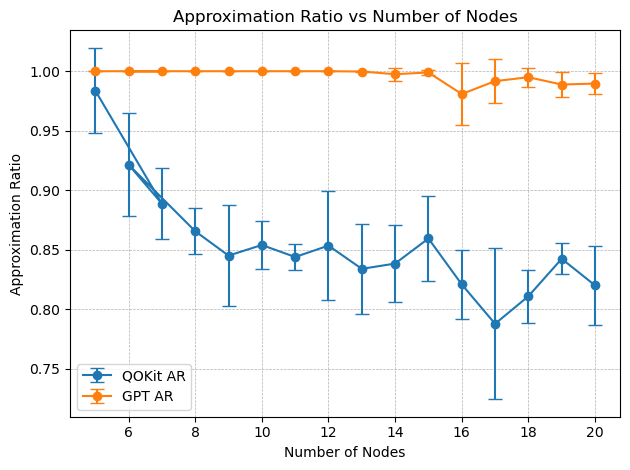

In [4]:
# Approximation ratio as a function of the number of nodes. We expect the GPT model to decline in AR quality.
u.draw_plot(
    x=node_counts,
    y_series=[qokit_ars, gpt_ars],
    y_errors=[qokit_ar_stds, gpt_ar_stds],
    labels=["QOKit AR", "GPT AR"],
    xlabel="Number of Nodes",
    ylabel="Approximation Ratio",
    title="Approximation Ratio vs Number of Nodes",
    filename = "AR_comparison.png"
)

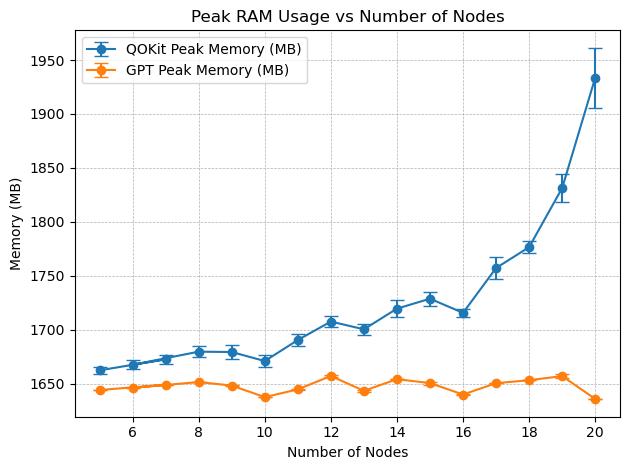

In [5]:
# RAM usage as a function of node count for QOKit and GPT mpdel 
u.draw_plot(
    x=node_counts,
    y_series=[qokit_mems, gpt_mems],
    y_errors=[qokit_mem_stds, gpt_mem_stds],
    labels=["QOKit Peak Memory (MB)", "GPT Peak Memory (MB)"],
    xlabel="Number of Nodes",
    ylabel="Memory (MB)",
    title="Peak RAM Usage vs Number of Nodes",
    filename='memory_comparison.png'
)